# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils_paper import *

%matplotlib inline

# Conventional Monopolar Diffusion with Slew Rate = 200mT/m/ms
The PNS threshold is exceeded for this waveform, thus the Slew Rate needes to be derated.

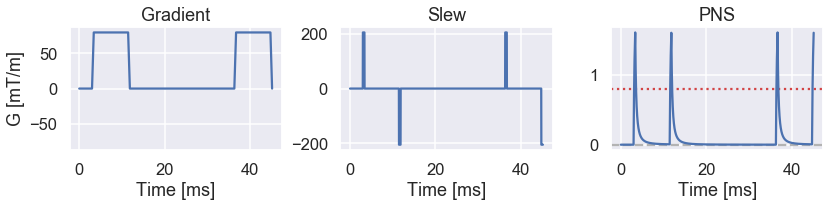

Echo Time = 65.21 ms and Diffusion b-value = 1000.87 s^2/mm


In [2]:
# Start of parameters to change
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 80            # mT/m
params['smax'] = 200           # mT/m/ms
params['T_readout'] = 20e-3    # s
params['T_90'] = 3e-3          # s
params['T_180'] = 5e-3         # s
params['b'] = 1020             # s/mm^2
# End of parameters to change

Mono, TE, b = monopolar_diffusion(params)
params['TE'] = TE/100
bval = plot_waveform(Mono, params, plot_moments = False, plot_slew = True, plot_pns = True, plot_eddy = False)
plt.show(plot_waveform)
print('Echo Time = %.2f ms and Diffusion b-value = %.2f s^2/mm' % (params['TE']+params['T_readout']*1e3, bval))

# Conventional Monopolar Diffusion with de-rated Slew Rate = 70mT/m/ms
After de-rating the Slew Rate, the PNS threshold is not exceeded, but is this waveform time efficient?

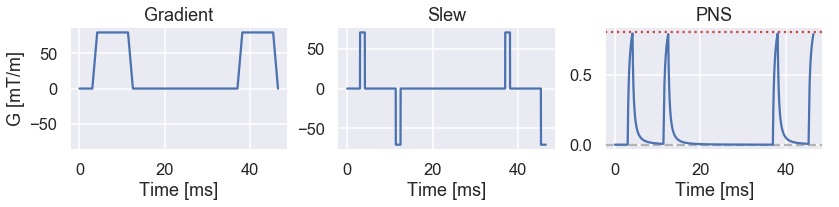

Echo Time = 66.52 ms and Diffusion b-value = 1001.13 s^2/mm


In [3]:
# Start of parameters to change
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 80            # mT/m
params['smax'] = 70            # mT/m/ms
params['T_readout'] = 20e-3    # s
params['T_90'] = 3e-3          # s
params['T_180'] = 5e-3         # s
params['b'] = 1225             # s/mm^2
# End of parameters to change

Mono, TE, b = monopolar_diffusion(params)
params['TE'] = TE/100
bval = plot_waveform(Mono, params, plot_moments = False, plot_slew = True, plot_pns = True, plot_eddy = False)
plt.show(plot_waveform)
print('Echo Time = %.2f ms and Diffusion b-value = %.2f s^2/mm' % (params['TE']+params['T_readout']*1e3, bval))

# CODE-M0 Diffusion with Slew Rate = 200mT/m/ms
The PNS threshold is exceeded for this waveform, thus a PNS constraint should be added.

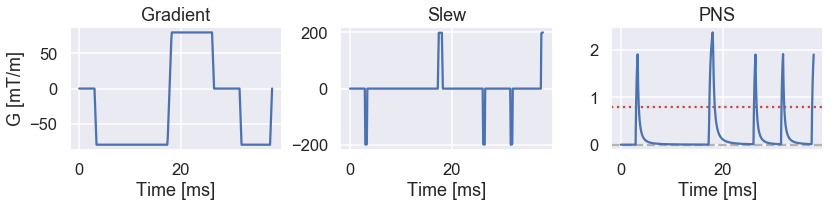

Echo Time = 57.96 ms and Diffusion b-value = 1008.75 s^2/mm


In [4]:
params = {}
params['mode'] = 'diff_bval'

# Start of parameters to change
params['gmax'] = 0.08
params['smax'] = 200.0
params['MMT'] = 0
params['T_readout'] = 20.0
params['T_90'] = 3.0
params['T_180'] = 5.0
params['dt'] = 100e-6
# End of parameters to change

G, TE = get_min_TE_diff(params, target_bval=1000, min_TE=50, max_TE=100, verbose=0)
bval = plot_waveform(G, params, plot_moments = False, plot_slew = True, plot_pns = True, plot_eddy = False)
plt.show(plot_waveform)
print('Echo Time = %.2f ms and Diffusion b-value = %.2f s^2/mm' % (TE, bval))


# CODE-M0 Diffusion with Slew Rate = 200mT/m/ms and 0.8 PNS Constraint

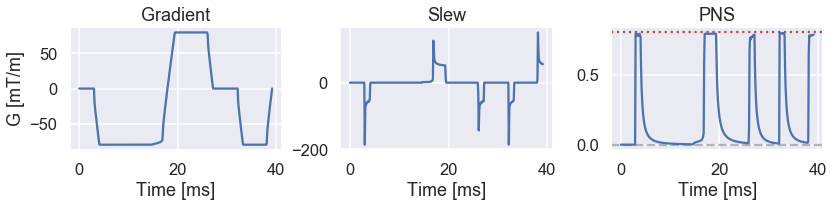

Echo Time = 59.25 ms and Diffusion b-value = 1000.18 s^2/mm


In [5]:
params = {}
params['mode'] = 'diff_bval'
params['pns_thresh'] = 0.8

# Start of parameters to change
params['gmax'] = 0.08
params['smax'] = 200.0
params['MMT'] = 0
params['T_readout'] = 20.0
params['T_90'] = 3.0
params['T_180'] = 5.0
params['dt'] = 100e-6
# End of parameters to change

G, TE = get_min_TE_diff(params, target_bval=1000, min_TE=50, max_TE=100, verbose=0)
bval = plot_waveform(G, params, plot_moments = False, plot_slew = True, plot_pns = True, plot_eddy = False)
plt.show(plot_waveform)
print('Echo Time = %.2f ms and Diffusion b-value = %.2f s^2/mm' % (TE, bval))